# 信号処理シンポジウム分析

In [1]:
# モジュール
import os
import pandas as pd

In [2]:
# 対象年度の設定
syear = 2008
eyear = 2017

In [3]:
# 期間内の論文タイトル
path = './siprep{0}_{1}.csv'.format(syear,eyear)
df = pd.read_csv(path,index_col=0)

In [4]:
#
df.head()

,Title,Year
0,チュートリアル講演: 最小分散低階数擬似不偏推定法(MV-PURE)とロバスト信号処理,2008
1,Directions for Use and Efficient Computation o...,2008
2,An Improvement of Subgradient Projection Opera...,2008
3,ハイパーH∞フィルタリング問題とその解法,2008
4,ゼロ位相信号による雑音除去,2008


参考サイト

- http://www.dskomei.com/entry/2018/04/11/001944

In [101]:
from janome.charfilter import *
from janome.analyzer import Analyzer
from janome.tokenizer import Tokenizer
from janome.tokenfilter import *

In [102]:
# 文字フィルタ
char_filters = [UnicodeNormalizeCharFilter(),
               RegexReplaceCharFilter('\(',''),
               RegexReplaceCharFilter('\)','')]

In [103]:
# トークンフィルタ
token_filters = [CompoundNounFilter(),
                 POSKeepFilter(['名詞', '動詞', '形容詞', '副詞'])]

In [104]:
# 形態素解析オブジェクト生成
tokenizer = Tokenizer('sipudic.csv', udic_type='simpledic', udic_enc='utf8')
analyzer = Analyzer(char_filters, tokenizer, token_filters)

In [158]:
tokens_list = []
for title in df.loc[:,'Title']:
    title_ = [token.base_form for token in analyzer.analyze(title)]
    if len(title_) > 0:
        tokens_list.append(title_)

In [164]:
words = []
for title in tokens_list:
    words.extend([word+' ' for word in title if word != ''])
text = ' '.join(words)

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [220]:
# ストップワードの設定
stop_words = [u'基づく', u'用いる', u'提案', u'ため', u'する', u'and', u'一検討', u'検討', 
              u'考慮', u'利用', u'研究', u'一考察', u'含む',
              'for', 'of', 'the', 'on', 'with', 'Using', 'Based', 'An', 'by', 'in']

In [221]:
# 日本語が使えるように日本語フォントの設定
fpath = 'C:\Windows\Fonts\SourceHanCodeJP-Regular.otf'

In [222]:
wordcloud = WordCloud(background_color='white',
                      font_path=fpath,
                      width=900,
                      height=500,
                      stopwords=set(stop_words)).generate(text)

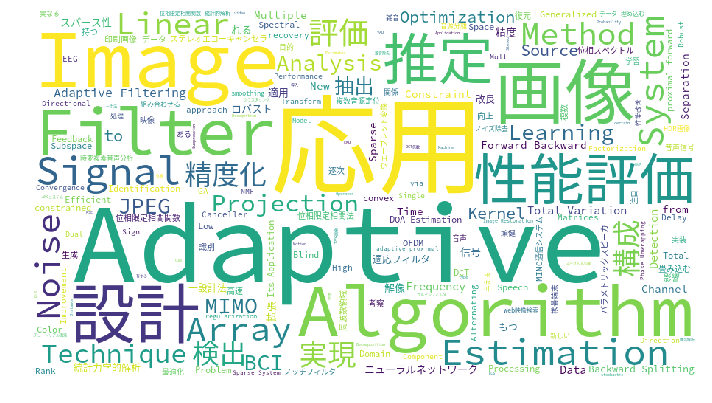

In [223]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
#plt.savefig(image_dir_path.joinpath(file_name.replace('list.txt', 'cloud.png')).__str__())
plt.show()